In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
%matplotlib inline
from sklearn.metrics import accuracy_score

In [2]:
y=pd.read_csv('Reviews.csv')

In [3]:
y.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
y.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [6]:
y['text length']=y['Text'].apply(len)

In [7]:
import seaborn as sns

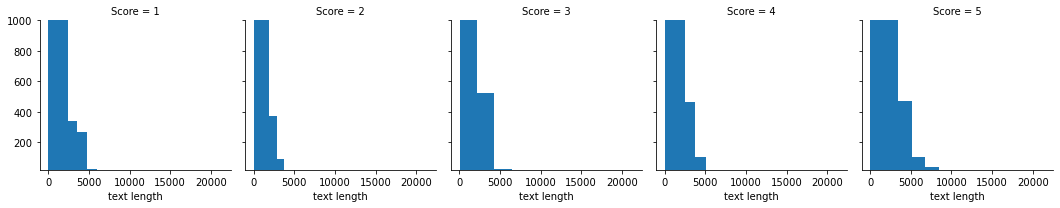

In [8]:
f=sns.FacetGrid(y,col='Score')
f.map(plt.hist,'text length')
f.set(ylim=(20,1000))

[(20.0, 3000.0)]

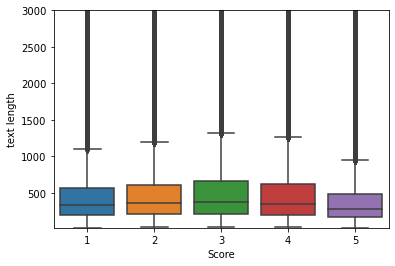

In [9]:
ax=sns.boxplot(x='Score',y='text length',data=y)
ax.set(ylim=(20,3000))

<AxesSubplot:xlabel='Score', ylabel='count'>

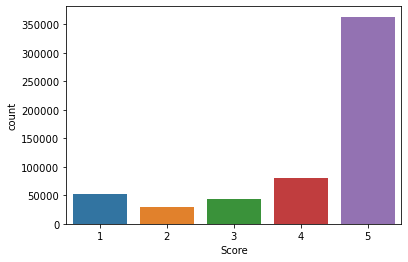

In [10]:
sns.countplot(x='Score',data=y)

In [11]:
s=y.groupby('Score').mean()
s

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Time,text length
Score,,,,,
1,282280.390258,2.735211,4.869825,1.303159e+09,478.082230
2,280778.019853,1.859014,3.102724,1.301131e+09,490.655010
3,279645.617495,1.700962,2.466393,1.300126e+09,520.319817
4,281713.258608,1.390292,1.666084,1.296722e+09,496.603261
5,285887.043393,1.675228,1.874108,1.294306e+09,402.447368


In [12]:
s.corr()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Time,text length
Id,1.000000,0.007005,-0.187289,-0.648444,-0.980093
HelpfulnessNumerator,0.007005,1.000000,0.975554,0.743499,-0.015590
HelpfulnessDenominator,-0.187289,0.975554,1.000000,0.865762,0.168137
Time,-0.648444,0.743499,0.865762,1.000000,0.610611
text length,-0.980093,-0.015590,0.168137,0.610611,1.000000


<AxesSubplot:>

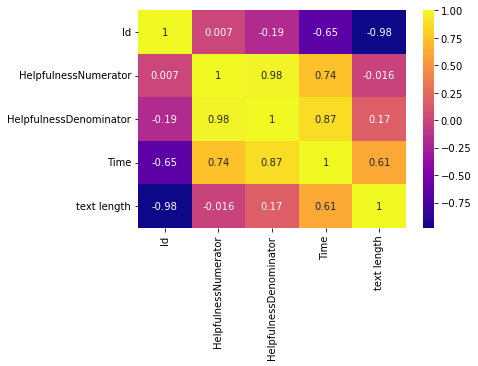

In [13]:
sns.heatmap(s.corr(),cmap='plasma',annot=True)

In [14]:
aclass=y[(y.Score==1) | (y.Score==5)]

In [15]:
X=aclass['Summary']
y=aclass['Score']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [17]:
X=cv.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [21]:
nb.fit(X_train,y_train)

MultinomialNB()

In [22]:
pred=nb.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 11209   4644]
 [  3135 105629]]
              precision    recall  f1-score   support

           1       0.78      0.71      0.74     15853
           5       0.96      0.97      0.96    108764

    accuracy                           0.94    124617
   macro avg       0.87      0.84      0.85    124617
weighted avg       0.94      0.94      0.94    124617



In [25]:
from sklearn.feature_extraction.text import TfidfTransformer

In [26]:
from sklearn.pipeline import Pipeline

In [27]:
pipe=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('nb',MultinomialNB())
])

In [29]:
X = aclass['Summary']
y = aclass['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [30]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('nb', MultinomialNB())])

In [31]:
prediction=pipe.predict(X_test)

In [32]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[  8176   7677]
 [   711 108053]]
              precision    recall  f1-score   support

           1       0.92      0.52      0.66     15853
           5       0.93      0.99      0.96    108764

    accuracy                           0.93    124617
   macro avg       0.93      0.75      0.81    124617
weighted avg       0.93      0.93      0.92    124617

